In [1]:
import pandas as pd
import datetime

data = pd.read_csv('CRM_data.csv')
df = pd.DataFrame(data)


In [2]:
df.columns

Index(['Subscribe date', 'Stagename', 'Project type', 'Property kind',
       'Source of lead', 'Amount', 'Lost reason', 'Lost date', 'Won',
       'Cout du lead'],
      dtype='object')

In [3]:
for column in df.columns:
    print(f'df["{column}"] => Taux de valeurs nulles : {round(((len(df[df[column].isnull()]))/df.shape[0])*100, 2)} %')

df["Subscribe date"] => Taux de valeurs nulles : 0.0 %
df["Stagename"] => Taux de valeurs nulles : 0.0 %
df["Project type"] => Taux de valeurs nulles : 0.17 %
df["Property kind"] => Taux de valeurs nulles : 48.78 %
df["Source of lead"] => Taux de valeurs nulles : 56.68 %
df["Amount"] => Taux de valeurs nulles : 0.0 %
df["Lost reason"] => Taux de valeurs nulles : 11.12 %
df["Lost date"] => Taux de valeurs nulles : 48.92 %
df["Won"] => Taux de valeurs nulles : 89.79 %
df["Cout du lead"] => Taux de valeurs nulles : 76.87 %


In [4]:
df.shape[0]

3606

In [5]:
for column in df.columns:
    print(f'df["{column}"] => Nombre de valeurs différents : {len(df[column].unique())}')

df["Subscribe date"] => Nombre de valeurs différents : 88
df["Stagename"] => Nombre de valeurs différents : 2
df["Project type"] => Nombre de valeurs différents : 4
df["Property kind"] => Nombre de valeurs différents : 6
df["Source of lead"] => Nombre de valeurs différents : 11
df["Amount"] => Nombre de valeurs différents : 207
df["Lost reason"] => Nombre de valeurs différents : 13
df["Lost date"] => Nombre de valeurs différents : 158
df["Won"] => Nombre de valeurs différents : 2
df["Cout du lead"] => Nombre de valeurs différents : 28


In [6]:
for column in df.columns:
    print(f'df["{column}"] => Nombre de valeurs différents : {df[column].unique()}')

df["Subscribe date"] => Nombre de valeurs différents : ['2019-02-25' '2019-02-26' '2019-01-09' '2019-03-22' '2019-03-03'
 '2019-03-09' '2019-03-21' '2019-03-27' '2019-02-07' '2019-01-05'
 '2019-01-17' '2019-02-11' '2019-01-08' '2019-01-12' '2019-01-20'
 '2019-01-02' '2019-01-04' '2019-02-16' '2019-01-19' '2019-02-22'
 '2019-02-09' '2019-02-21' '2019-02-28' '2019-03-28' '2019-03-23'
 '2019-02-27' '2019-01-16' '2019-02-08' '2019-02-20' '2019-02-13'
 '2019-02-17' '2019-02-03' '2019-02-01' '2019-01-06' '2019-01-27'
 '2019-01-26' '2019-01-07' '2019-01-23' '2019-01-14' '2019-02-10'
 '2019-03-26' '2019-03-05' '2019-01-03' '2019-01-13' '2019-02-18'
 '2019-01-01' '2019-03-25' '2019-03-14' '2019-03-07' '2019-03-01'
 '2019-03-04' '2019-03-13' '2019-03-20' '2019-03-19' '2019-03-29'
 '2019-01-30' '2019-01-15' '2019-03-18' '2019-01-11' '2019-01-29'
 '2019-03-06' '2019-01-10' '2019-02-06' '2019-02-15' '2019-02-02'
 '2019-03-11' '2019-03-08' '2019-03-15' '2019-03-02' '2019-03-16'
 '2019-03-10' '2019-0

In [7]:

'''date_object = datetime.strptime('2019-08-14', '%Y-%m-%d')
print(type(date_object))'''
my_date = datetime.date(year=1999, month=4, day=11)
print(my_date)





1999-04-11


In [8]:

df["Subscribe date"] = df["Subscribe date"].apply(pd.to_datetime)
df["Lost date"] = df["Lost date"].apply(pd.to_datetime)


In [9]:
df.insert(2, column='Stagename_bin', value=(df['Stagename'].apply(lambda x : 1 if x == "Gagné" else 0 )))
df

,Subscribe date,Stagename,Stagename_bin,Project type,Property kind,Source of lead,Amount,Lost reason,Lost date,Won,Cout du lead
0,2019-02-25,Gagné,1,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN
1,2019-02-26,Perdu,0,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN
2,2019-01-09,Perdu,0,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN
3,2019-03-22,Perdu,0,primary_residence,new,partner1,215,Projet en recherche / Projet lointain,2019-03-28,NaN,NaN
4,2019-03-03,Gagné,1,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,0,rental_investment,NaN,NaN,196,Perdu contre autre banque,NaT,NaN,NaN
3602,2019-01-03,Gagné,1,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN
3603,2019-03-06,Perdu,0,rental_investment,old,NaN,242,Projet en recherche / Projet lointain,2019-03-15,NaN,NaN
3604,2019-02-14,Perdu,0,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN


In [10]:
df.Stagename_bin.sum()
df

,Subscribe date,Stagename,Stagename_bin,Project type,Property kind,Source of lead,Amount,Lost reason,Lost date,Won,Cout du lead
0,2019-02-25,Gagné,1,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN
1,2019-02-26,Perdu,0,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN
2,2019-01-09,Perdu,0,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN
3,2019-03-22,Perdu,0,primary_residence,new,partner1,215,Projet en recherche / Projet lointain,2019-03-28,NaN,NaN
4,2019-03-03,Gagné,1,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,0,rental_investment,NaN,NaN,196,Perdu contre autre banque,NaT,NaN,NaN
3602,2019-01-03,Gagné,1,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN
3603,2019-03-06,Perdu,0,rental_investment,old,NaN,242,Projet en recherche / Projet lointain,2019-03-15,NaN,NaN
3604,2019-02-14,Perdu,0,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN


In [11]:
df_stagename = df['Stagename']
df_stagename = df_stagename.to_frame()
df_stagename = df_stagename.join(pd.get_dummies(df['Stagename']))
df_stagename

,Stagename,Gagné,Perdu
0,Gagné,1,0
1,Perdu,0,1
2,Perdu,0,1
3,Perdu,0,1
4,Gagné,1,0
...,...,...,...
3601,Perdu,0,1
3602,Gagné,1,0
3603,Perdu,0,1
3604,Perdu,0,1


In [12]:
#8

df_project_type = df['Project type']
df_project_type = df_project_type.to_frame()
df_project_type = df_project_type.join(pd.get_dummies(df['Project type']))
df_project_type

,Project type,primary_residence,rental_investment,secondary_residence
0,primary_residence,1,0,0
1,primary_residence,1,0,0
2,primary_residence,1,0,0
3,primary_residence,1,0,0
4,rental_investment,0,1,0
...,...,...,...,...
3601,rental_investment,0,1,0
3602,primary_residence,1,0,0
3603,rental_investment,0,1,0
3604,primary_residence,1,0,0


In [13]:
#9
df.rename(columns={'Lost reason': 'Lost_reason', 'Source of lead': 'Source_of_lead'}, inplace=True)


In [14]:
#10

df_gb = df.groupby(['Source_of_lead']).sum()
df_gb.drop(columns =['Stagename_bin', 'Won', 'Cout du lead'], inplace=True)
df_gb

/var/folders/rw/3l7m_pl90hgbgv97f87910n00000gn/T/ipykernel_2967/4129597266.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gb = df.groupby(['Source_of_lead']).sum()


,Amount
Source_of_lead,
partner1,13996
partner10,4153
partner2,34871
partner3,7301
partner4,65485
partner5,3940
partner6,23800
partner7,690
partner8,1935


In [15]:
#11 

df_stagename['total'] = df_stagename['Gagné'] + df_stagename['Perdu']
df_stagename
#la colonne 'total' correspond à la somme des clients perdus et gagnés, il reste néanmois quelques valeurs nulles

,Stagename,Gagné,Perdu,total
0,Gagné,1,0,1
1,Perdu,0,1,1
2,Perdu,0,1,1
3,Perdu,0,1,1
4,Gagné,1,0,1
...,...,...,...,...
3601,Perdu,0,1,1
3602,Gagné,1,0,1
3603,Perdu,0,1,1
3604,Perdu,0,1,1


In [16]:
#12

df_stagename = df_stagename.drop(columns='total')
df_stagename

,Stagename,Gagné,Perdu
0,Gagné,1,0
1,Perdu,0,1
2,Perdu,0,1
3,Perdu,0,1
4,Gagné,1,0
...,...,...,...
3601,Perdu,0,1
3602,Gagné,1,0
3603,Perdu,0,1
3604,Perdu,0,1


In [17]:
#13

myfunc = lambda x : x.replace('/','-') if type(x)==str and '/' in x else x
df['Lost_reason'] = df['Lost_reason'].apply(myfunc)
df

,Subscribe date,Stagename,Stagename_bin,Project type,Property kind,Source_of_lead,Amount,Lost_reason,Lost date,Won,Cout du lead
0,2019-02-25,Gagné,1,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN
1,2019-02-26,Perdu,0,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN
2,2019-01-09,Perdu,0,primary_residence,NaN,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN
3,2019-03-22,Perdu,0,primary_residence,new,partner1,215,Projet en recherche - Projet lointain,2019-03-28,NaN,NaN
4,2019-03-03,Gagné,1,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,0,rental_investment,NaN,NaN,196,Perdu contre autre banque,NaT,NaN,NaN
3602,2019-01-03,Gagné,1,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN
3603,2019-03-06,Perdu,0,rental_investment,old,NaN,242,Projet en recherche - Projet lointain,2019-03-15,NaN,NaN
3604,2019-02-14,Perdu,0,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN


In [18]:
#14

my_func_2 = lambda x : '0ther' if type(x)!=str else x
df['Property kind'] = df['Property kind'].apply(my_func_2)
df

,Subscribe date,Stagename,Stagename_bin,Project type,Property kind,Source_of_lead,Amount,Lost_reason,Lost date,Won,Cout du lead
0,2019-02-25,Gagné,1,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN
1,2019-02-26,Perdu,0,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,NaN,NaN
2,2019-01-09,Perdu,0,primary_residence,0ther,partner1,243,N'a jamais répondu (+5 appels),NaT,NaN,NaN
3,2019-03-22,Perdu,0,primary_residence,new,partner1,215,Projet en recherche - Projet lointain,2019-03-28,NaN,NaN
4,2019-03-03,Gagné,1,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,0,rental_investment,0ther,NaN,196,Perdu contre autre banque,NaT,NaN,NaN
3602,2019-01-03,Gagné,1,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN
3603,2019-03-06,Perdu,0,rental_investment,old,NaN,242,Projet en recherche - Projet lointain,2019-03-15,NaN,NaN
3604,2019-02-14,Perdu,0,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,NaN,NaN


In [19]:
#15

total_day = (df['Subscribe date'].max() - df['Subscribe date'].min()).days
total_new_customer = df['Subscribe date'].count()
new_customer_per_30days = (total_new_customer/total_day)*30
new_customer_per_30days

1243.448275862069

In [20]:
#2

df_gb = pd.DataFrame()
df_gb["month"] = pd.to_datetime(df["Subscribe date"]).dt.month
df_gb["day"]  = pd.to_datetime(df["Subscribe date"]).dt.day
df_gb = df_gb.join(df['Stagename_bin'])
df_gb1 = df_gb.groupby(['month','day'])['Stagename_bin'].mean()

<AxesSubplot: xlabel='month,day'>

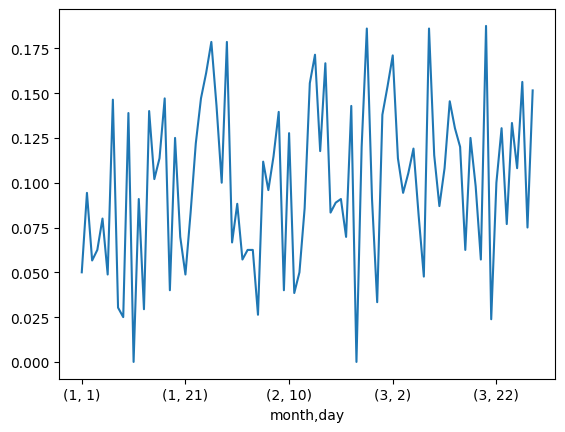

In [21]:
#2bis

df_gb1.plot()

In [25]:
#3

df_dp = pd.DataFrame()
df_dp = df[['Lost_reason', 'Stagename']]
df_dp = df_dp.join(pd.get_dummies(df['Stagename']))
df_dp = df_dp.groupby(['Lost_reason'])['Perdu'].sum().sort_values(ascending=False)
#on remarque qu'une grosse partie des pertes est dû à des appels non-aboutis, et de la concurence des autres banques

In [23]:
#4

#Le directeur marketing pourrait par exemple financer la monter en compétence des employés de la centrale d'appel.
#Améliorer l'étape de collecte de numéro de téléphone
#Revoir l'offre de la banque, pour la rendre plus compétitive


<AxesSubplot: xlabel='Raisons évoqués', ylabel='Nombre de dossier Perdu'>

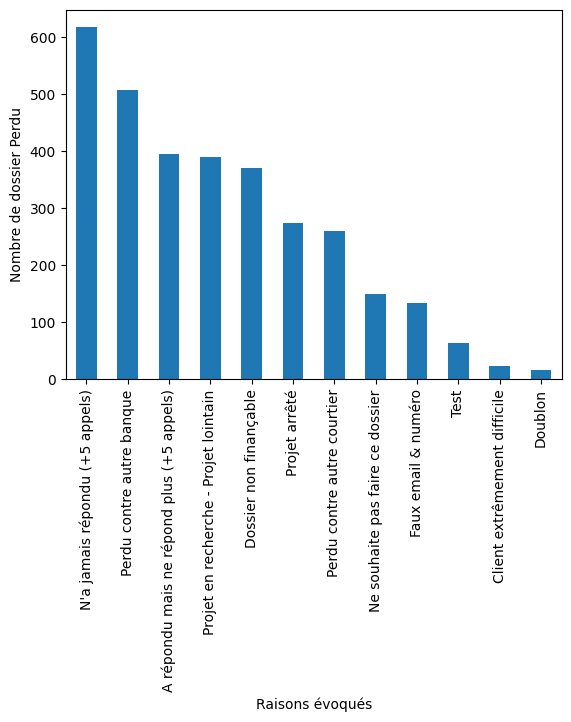

In [34]:
#5

#On peut faire un graph permettant de voir le nombre de dossier perdu en fonction des raisons qui ont causés cette perte.

df_dp.plot(kind="bar", ylabel="Nombre de dossier Perdu", xlabel="Raisons évoqués")

<AxesSubplot: ylabel='Stagename'>

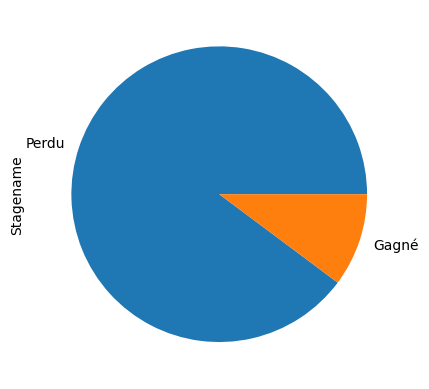

In [41]:
#

df_lead_converti = pd.DataFrame()
df_lead_converti = df['Stagename']
df_lead_converti.value_counts().plot(kind='pie')

In [ ]:
#6

#Non car même s'il manque 75% des données, ces données sont precieuses pour estimer les coûts d'acquisition 
# sur les futures clients et identifier là ou l'argent est le mieux dépensé

In [53]:
#7, Je décide en effet de modifier la colonne 'Won' et de supprimer tous les NaN

df['Won'] = df['Won'].fillna(0)
df

,Subscribe date,Stagename,Stagename_bin,Project type,Property kind,Source_of_lead,Amount,Lost_reason,Lost date,Won,Cout du lead
0,2019-02-25,Gagné,1,primary_residence,old,partner1,118,NaN,NaT,1.0,NaN
1,2019-02-26,Perdu,0,primary_residence,new,partner1,184,N'a jamais répondu (+5 appels),2019-03-13,0.0,NaN
2,2019-01-09,Perdu,0,primary_residence,0ther,partner1,243,N'a jamais répondu (+5 appels),NaT,0.0,NaN
3,2019-03-22,Perdu,0,primary_residence,new,partner1,215,Projet en recherche - Projet lointain,2019-03-28,0.0,NaN
4,2019-03-03,Gagné,1,rental_investment,old,partner1,142,NaN,NaT,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3601,2019-01-26,Perdu,0,rental_investment,0ther,NaN,196,Perdu contre autre banque,NaT,0.0,NaN
3602,2019-01-03,Gagné,1,primary_residence,old,NaN,59,NaN,NaT,1.0,NaN
3603,2019-03-06,Perdu,0,rental_investment,old,NaN,242,Projet en recherche - Projet lointain,2019-03-15,0.0,NaN
3604,2019-02-14,Perdu,0,primary_residence,old,NaN,112,Ne souhaite pas faire ce dossier,2019-04-01,0.0,NaN


nan


numpy.float64